In [1]:
from sklearn.datasets import load_digits
import pandas as pd
import seaborn as sns
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.manifold import TSNE
from umap import UMAP
from sklearn.decomposition import PCA
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
data = load_digits()
print(type(data))

<class 'sklearn.utils._bunch.Bunch'>


In [4]:
# Convert to DataFrame
df = pd.DataFrame(data = np.c_[data['data'], data['target']],
                     columns= data['feature_names'] + ['class'])
df['class'] = df['class'].astype("int")
df.head()


,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,class
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [6]:
df.shape

(1797, 65)

## Inspect data
Distribution of all variables before clustering

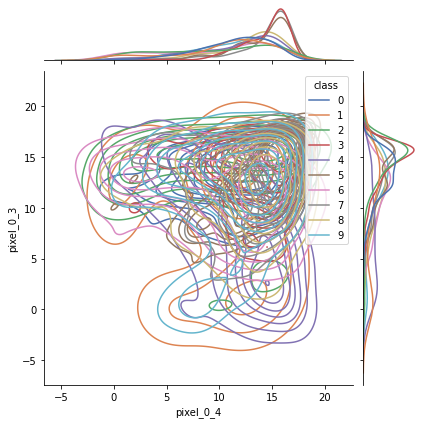

In [305]:
sns.jointplot(data = df, x = "pixel_0_4", y = "pixel_0_3",  hue = "class", kind = "kde", palette="deep");

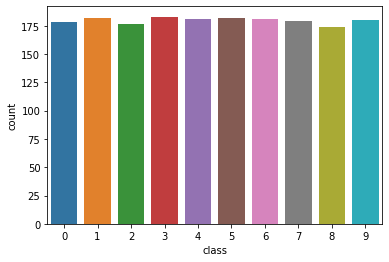

In [110]:
sns.countplot(x = "class", data = df);

In [68]:
true_labels = df.pop("class") # Target
true_labels.value_counts() #observing distribution of features using the true label

3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: class, dtype: int64

## Feature Scaling
Standardization

In [69]:
df = (df-df.mean())/df.std()

In [70]:
df.isnull().sum()[df.isnull().sum()>0]

pixel_0_0    1797
pixel_4_0    1797
pixel_4_7    1797
dtype: int64

In [71]:
df.pop('pixel_0_0')
df.pop('pixel_4_0')
df.pop('pixel_4_7')
print(df.shape)

(1797, 61)


## Apply DBSCAN

In [145]:
dbscan = DBSCAN(eps=0.5, min_samples=10).fit(df)

In [146]:
# Create a array of False in the shape of n_samples
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool) 
# Add True whenever a datapoint is a core sample
core_samples_mask[dbscan.core_sample_indices_] = True 
# print(core_samples_mask[:150])
print(core_samples_mask.shape)

(1797,)


In [147]:
# Cluster labels for each point in the dataset given to fit()
# Noisy samples are given the label -1
labels = dbscan.labels_
print(labels[:150])

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1]


In [148]:
# Number of clusters in labels, ignoring noise (-1) if present in labels.
n_clusters_ = len(np.unique(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters:", n_clusters_)
print("Estimated number of noise points:", n_noise_)
#print("Silhouette Score: %0.3f" % metrics.silhouette_score(df, labels))
#print("Davies Bouldin Score: %0.3f" % metrics.davies_bouldin_score(df, labels))


Estimated number of clusters: 0
Estimated number of noise points: 1797


### Plot

unique_labels:  {-1}
number of colours:  1


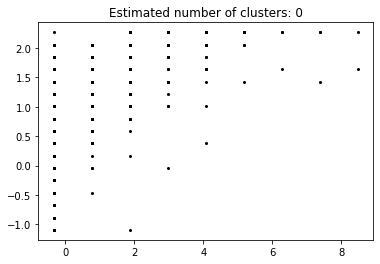

In [144]:
# Black removed and is used for noise instead.
unique_labels = set(labels)# Creates set which is an unordered collection with no duplicates
print("unique_labels: " , unique_labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))] # Create colors for all labels
print('number of colours: ', len(colors))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = df.to_numpy()[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = df.to_numpy()[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=2,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

In [45]:
#sns.jointplot(data = df, x = "pixel_0_4", y = "pixel_0_3",  hue = labels, kind = "kde", palette="deep");

### Applying UMAP 

In [174]:
umap = UMAP(random_state=0)
projections = umap.fit_transform(df)
print(projections.shape)

(1797, 2)


In [175]:
dbscan = DBSCAN(eps=0.5, min_samples=10).fit(projections)

In [176]:
# Create a array of False in the shape of n_samples
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool) 
# Add True whenever a datapoint is a core sample
core_samples_mask[dbscan.core_sample_indices_] = True 
# print(core_samples_mask[:150])
print(core_samples_mask.shape)

(1797,)


In [177]:
labels = dbscan.labels_
print(labels[:150])

[0 1 1 2 3 4 5 6 1 4 0 7 8 2 3 9 5 6 1 4 0 7 8 2 3 9 5 6 1 4 0 4 9 9 5 9 0
 4 1 4 1 3 7 6 6 2 9 7 0 0 1 1 6 1 1 0 7 1 5 2 2 6 2 2 3 5 5 5 3 1 7 9 0 4
 9 1 1 1 0 0 7 6 5 2 8 7 6 1 5 2 7 2 4 7 6 5 1 3 2 1 3 0 9 2 5 4 5 7 6 9 3
 3 6 1 1 1 1 9 6 4 9 3 1 1 3 4 0 1 4 1 0 7 8 2 3 9 5 6 1 4 0 7 8 2 3 9 5 6
 1 4]


In [178]:
n_clusters_ = len(np.unique(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print("Estimated number of clusters:", n_clusters_)
print("Estimated number of noise points:", n_noise_)
print("Silhouette Score: %0.3f" % metrics.silhouette_score(projections, labels))
print("Davies Bouldin Score: %0.3f" % metrics.davies_bouldin_score(projections, labels))

Estimated number of clusters: 12
Estimated number of noise points: 7
Silhouette Score: 0.611
Davies Bouldin Score: 0.417


### ploting clusters

unique_labels:  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, -1}
number of colours:  13


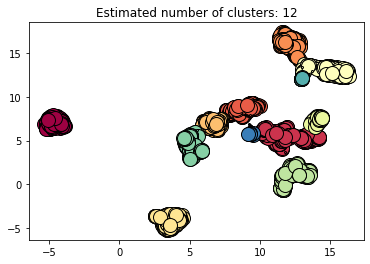

In [179]:
# Black removed and is used for noise instead.
unique_labels = set(labels)# Creates set which is an unordered collection with no duplicates
print("unique_labels: " , unique_labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))] # Create colors for all data points
print('number of colours: ', len(colors))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = projections[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = projections[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=2,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

### Applying PCA followed by UMAP


In [180]:
pca = PCA(n_components=10)
pca_data = pca.fit_transform(df)
pca_data.shape

(1797, 10)

In [181]:
umap = UMAP(random_state=0)
pca_projections = umap.fit_transform(pca_data)
print(pca_projections.shape)

(1797, 2)


In [182]:
dbscan = DBSCAN(eps=0.5, min_samples=10).fit(pca_projections)

In [183]:
# Create a array of False in the shape of n_samples
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool) 
# Add True whenever a datapoint is a core sample
core_samples_mask[dbscan.core_sample_indices_] = True 
# print(core_samples_mask[:150])
print(core_samples_mask.shape)

(1797,)


In [184]:
labels = dbscan.labels_
print(labels[:150])

[0 1 1 1 2 1 3 4 1 1 0 5 6 1 2 1 3 4 1 1 0 5 6 1 2 1 3 4 1 1 0 1 1 1 3 1 0
 1 1 1 1 2 5 4 4 1 1 5 0 0 1 1 4 1 1 0 5 1 3 1 1 4 1 1 2 3 3 3 2 1 5 1 0 1
 1 1 1 1 0 0 5 4 3 1 6 5 4 1 3 1 5 1 1 5 4 1 1 2 1 1 2 0 1 1 3 1 3 5 4 1 2
 2 4 6 1 1 1 1 4 1 1 2 1 1 2 1 0 1 1 1 0 5 6 1 2 1 3 4 1 1 0 5 6 1 2 1 3 4
 1 1]


In [185]:
# Number of clusters in labels, ignoring noise (-1) if present in labels.
n_clusters_ = len(np.unique(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print("Estimated number of clusters:", n_clusters_)
print("Estimated number of noise points:", n_noise_)
print("Silhouette Score: %0.3f" % metrics.silhouette_score(pca_projections, labels))
print("Davies Bouldin Score: %0.3f" % metrics.davies_bouldin_score(pca_projections, labels))



Estimated number of clusters: 9
Estimated number of noise points: 0
Silhouette Score: 0.564
Davies Bouldin Score: 0.403


### ploting PCA clusters

unique_labels:  {0, 1, 2, 3, 4, 5, 6, 7, 8}
number of colours:  9


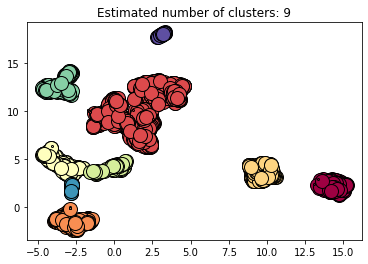

In [186]:
# Black removed and is used for noise instead.
unique_labels = set(labels)# Creates set which is an unordered collection with no duplicates
print("unique_labels: " , unique_labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))] # Create colors for all data points
print('number of colours: ', len(colors))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = pca_projections[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = pca_projections[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=2,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()